Tree Census Bengaluru 2025.
Data downloaded from OpenCity https://data.opencity.in/dataset/bengaluru-tree-census-data

I have analysed the ongoing Tree Census in Bengaluru. The code was written in February 2025. As and when data is added I will update the code.


Happy Coding, be curious :)

In [135]:

from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas



import os
import geopandas as gpd

# Step 4: Define the path to your folder
folder_path = '/content/drive/My Drive/2025_bengaluru_treecensus' #give the path where data is saved

# Step 5: List all KML files in the folder
kml_files = [f for f in os.listdir(folder_path) if f.endswith('.kml')]

# Step 6: Load each KML file into a GeoDataFrame
for kml_file in kml_files:
    file_path = os.path.join(folder_path, kml_file)
    gdf = gpd.read_file(file_path)
    print(f"Loaded {kml_file} with {len(gdf)} features")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded bbmp_tree_census_yelahanka_jan_2025.kml with 10529 features
Loaded bbmp_tree_census_west_jan_2025.kml with 19855 features
Loaded bbmp_tree_census_mahadevapura_jan_2025.kml with 48279 features
Loaded bbmp_tree_census_east_jan_2025.kml with 52227 features
Loaded bbmp_tree_census_south_jan_2025.kml with 72456 features
Loaded bbmp_tree_census_bommanahalli_jan_2025.kml with 103385 features
Loaded bbmp_tree_census_rr_nagar_jan_2025.kml with 110157 features


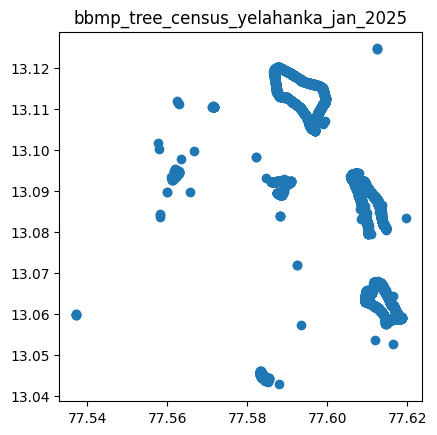

In [136]:
#this is just to load and check one kml

import pandas as pd
import matplotlib.pyplot as plt



file_path = os.path.join(folder_path, 'bbmp_tree_census_yelahanka_jan_2025.kml')
gdf = gpd.read_file(file_path)

# Plot the GeoDataFrame
gdf.plot()
plt.title('bbmp_tree_census_yelahanka_jan_2025')
plt.show()


In [137]:
# while loading kml certain columns were missing. Hence i merged all 7 kml in QGIS. saved as a geopackage and uploaded it to drive

import pandas as pd
import geopandas as gpd

file_path = '/content/drive/My Drive/2025_bengaluru_treecensus/merged_tree_2025.gpkg'
gdf_allzones = gpd.read_file(file_path)

# Now you can work with the geopandas GeoDataFrame 'gdf'
print(gdf_allzones.head())


   Name description timestamp begin end altitudeMode  tessellate  extrude  \
0  None        None       NaT   NaT NaT         None          -1        0   
1  None        None       NaT   NaT NaT         None          -1        0   
2  None        None       NaT   NaT NaT         None          -1        0   
3  None        None       NaT   NaT NaT         None          -1        0   
4  None        None       NaT   NaT NaT         None          -1        0   

   visibility  drawOrder  ... OBJECTID                              TreeName  \
0          -1        NaN  ...     5786   Khaya Senegalensis (Desr.) A. Juss.   
1          -1        NaN  ...     5791  Acacia Auriculiformis Cunn. Ex Benth   
2          -1        NaN  ...     5796  Acacia Auriculiformis Cunn. Ex Benth   
3          -1        NaN  ...     5798  Acacia Auriculiformis Cunn. Ex Benth   
4          -1        NaN  ...     5799      Wrightia Tinctoria (Roxb.) R. Br   

        KGISTreeID DepartmentCode                       

In [138]:

print(gdf_allzones.crs)

EPSG:4326


In [139]:
# prompt: how many unique values are in column TreeName. The no of species

# Assuming 'gdf' is your GeoDataFrame
unique_species_count = gdf_allzones['TreeName'].nunique()
print(f"Number of unique tree species: {unique_species_count}")


Number of unique tree species: 234


we will ignore others. Total species will be **233**

In [140]:
# prompt: write a code that will group species with same name and create a table

# Group by 'TreeName' and count occurrences
species_counts = gdf_allzones.groupby('TreeName').size().reset_index(name='Count')

# Sort the table by count in descending order
species_counts = species_counts.sort_values(by='Count', ascending=False)

# Display the table
species_counts


TreeName   Count
153                                Others  160463
173          Pongamia Pinnata (L.) Pierre   72725
200         Swietenia Mahagoni (L.) Jacq.   16622
212           Tabebuia Rosea (Bertol) Dc.   10351
189         Saraca Asoca (Roxb.) De Wilde    8655
..                                    ...     ...
123                 Limonia Acidissima L.       3
87   Eriobotrya Japonica (Thunb.) Lindley       2
217    Tecoma Castanifolia (D. Don) Melch       2
39                 Brownea Coccinea Jacq.       2
137              Melaleuca Leucodendron L       1

[234 rows x 2 columns]

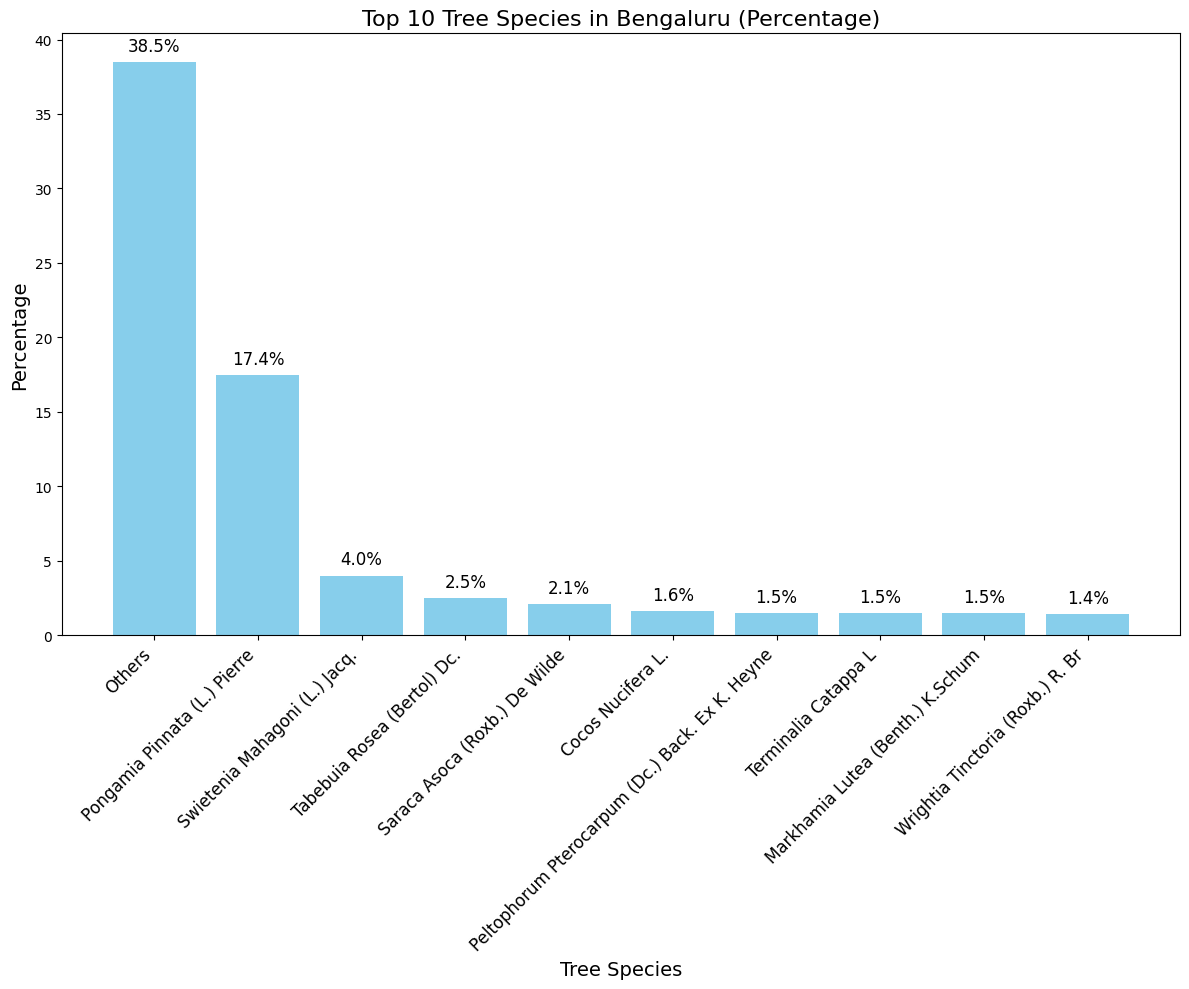

In [141]:


import matplotlib.pyplot as plt

total_trees = species_counts['Count'].sum()
species_counts['Percentage'] = (species_counts['Count'] / total_trees) * 100

#  top 10 species
top_10_species = species_counts.head(10)

#  bar chart
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
bars = plt.bar(top_10_species['TreeName'], top_10_species['Percentage'], color='skyblue')
plt.xlabel("Tree Species", fontsize=14) # Increased font size
plt.ylabel("Percentage", fontsize=14) # Increased font size
plt.title("Top 10 Tree Species in Bengaluru (Percentage)", fontsize=16) # Increased font size
plt.xticks(rotation=45, ha='right', fontsize=12) # Increased font size and rotated labels
plt.tight_layout()

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, top_10_species['Percentage']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12) # Increased font size

plt.show()


In [142]:

top_10_species = species_counts.head(10)

# Print the list of top 10 species
print(top_10_species['TreeName'].tolist())


['Others', 'Pongamia Pinnata (L.) Pierre', 'Swietenia Mahagoni (L.) Jacq.', 'Tabebuia Rosea (Bertol) Dc.', 'Saraca Asoca (Roxb.) De Wilde', 'Cocos Nucifera L.', 'Peltophorum Pterocarpum (Dc.) Back. Ex K. Heyne', 'Terminalia Catappa L', 'Markhamia Lutea (Benth.) K.Schum', 'Wrightia Tinctoria (Roxb.) R. Br']


In [143]:
# I want to see the distribution of Tabebuia Rosea. The tree that gives Bengaluru pink colours.

# Filter the GeoDataFrame for 'Tabebuia Rosea (Bertol) Dc.'
tabebuia_rosea_gdf = gdf_allzones[gdf_allzones['TreeName'] == 'Tabebuia Rosea (Bertol) Dc.']

# Export the filtered GeoDataFrame to a new GeoPackage file
output_file = '/content/drive/My Drive/2025_bengaluru_treecensus/tabebuia_rosea.gpkg'
tabebuia_rosea_gdf.to_file(output_file, driver='GPKG')

print(f"GeoPackage file created: {output_file}")


GeoPackage file created: /content/drive/My Drive/2025_bengaluru_treecensus/tabebuia_rosea.gpkg


In [144]:
#  print count of tabebuia_rosea_gdf. The tree that gives Bengaluru pink colour.

print(len(tabebuia_rosea_gdf))


10351


In [145]:
# prompt: use folium and plot tabebuia_rosea_gdf

!pip install folium

import folium

# Create a map centered on Bengaluru
m = folium.Map(location=[12.9716, 77.5946], zoom_start=10)

# Add the Tabebuia Rosea points to the map
for index, row in tabebuia_rosea_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=0.5,  # Adjust the radius as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.1
    ).add_to(m)

# Display the map
m
